# **Project 3**, APS1070 Winter 2021
#### **PCA [15 marks]**
**Deadline: March 20, 23:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   **Name**: Anchit Vijayakumar
*   **Student number**: 1007014035



We will work on three datasets:
* The first Covid-19 dataset reports the number of total cases for different countries at the end of each day. We will use this dataset in **Parts 1 to 3**.
* The second Covid-19 dataset reports the total number of recovered patients for each country at the end of each day. We use this dataset in **Part 4 and 5**. 
* Finally, we will apply PCA to images using the MNIST dataset of handwritten digits in **Part 6**.

# Part 1: Getting started [2 Marks]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from matplotlib import dates as mpl_dates
cases_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/cases_feb_21.csv',
    index_col=0,
    thousands=','
)

1. Plot the time-series for the `US`, `China`, ` Canada`, and 3 other countries of your choice. Plot them in separate graphs (subplots), so you can easily see the trend for each country. **[0.25]**
2. Apply `StandardScalar` to the data. Each day should have a `mean` of zero and a `StD` of 1. **[0.5]**
3. Plot the standardized time-series for the same countries as in `Step 1`. **[0.25]**
4. Discuss the trends in the standardized time-series for the `US`, `Canada`, and `China`. What does it mean if the curve goes up or down? What do negative and positive values mean? **[1]**

In [ ]:
cases_raw 

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2021-01-13,2021-01-14,2021-01-15,2021-01-16,2021-01-17,2021-01-18,2021-01-19,2021-01-20,2021-01-21,2021-01-22,2021-01-23,2021-01-24,2021-01-25,2021-01-26,2021-01-27,2021-01-28,2021-01-29,2021-01-30,2021-01-31,2021-02-01,2021-02-02,2021-02-03,2021-02-04,2021-02-05,2021-02-06,2021-02-07,2021-02-08,2021-02-09,2021-02-10,2021-02-11,2021-02-12,2021-02-13,2021-02-14,2021-02-15,2021-02-16,2021-02-17,2021-02-18,2021-02-19,2021-02-20,2021-02-21
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,53584,53775,53831,53938,53984,54062,54141,54278,54403,54483,54559,54595,54672,54750,54854,54891,54939,55008,55023,55059,55121,55174,55231,55265,55330,55335,55359,55384,55402,55420,55445,55473,55492,55514,55518,55540,55557,55575,55580,55604
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,65334,65994,66635,67216,67690,67982,68568,69238,69916,70655,71441,72274,72812,73691,74567,75454,76350,77251,78127,78992,79934,80941,81993,83082,84212,85336,86289,87528,88671,89776,90835,91987,93075,93850,94651,95726,96838,97909,99062,100246
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,102860,103127,103381,103611,103833,104092,104341,104606,104852,105124,105369,105596,105854,106097,106359,106610,106887,107122,107339,107578,107841,108116,108381,108629,108629,109088,109313,109559,109782,110049,110303,110513,110711,110894,111069,111247,111418,111600,111764,111917
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8818,8868,8946,9038,9083,9083,9194,9308,9379,9416,9499,9549,9596,9638,9716,9779,9837,9885,9937,9972,10017,10070,10137,10172,10206,10251,10275,10312,10352,10391,10427,10463,10503,10538,10555,10583,10610,10645,10672,10699
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,18425,18613,18679,18765,18875,18926,19011,19093,19177,19269,19367,19399,19476,19553,19580,19672,19723,19782,19796,19829,19900,19937,19996,20030,20062,20086,20112,20163,20210,20261,20294,20329,20366,20381,20389,20400,20452,20478,20499,20519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,1521,1531,1536,1537,1537,1539,1540,1544,1546,1548,1548,1548,1549,1551,1553,1651,1657,1767,1817,1850,1882,1948,1957,1976,1985,2001,2050,2064,2091,2140,2142,2195,2228,2269,2311,2329,2347,2362,2368,2383
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,149769,150505,151142,151569,152031,152555,153093,153590,154063,154557,155006,155414,155884,156393,156996,157593,158168,158559,158962,159443,159956,160426,161087,161559,162029,162601,163213,163975,164736,165535,166200,166800,167604,168444,169487,170527,171154,171717,172315,173635
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2109,2110,2111,2112,2112,2113,2115,2115,2115,2118,2118,2118,2118,2119,2120,2120,2120,2120,2121,2122,2122,2122,2122,2124,2127,2127,2131,2131,2133,2134,2136,2136,2145,2145,2148,2151,2154,2157,2157,2165
Zambia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,31100,32800,34278,3607

In [ ]:
US = cases_raw.loc['US']
China = cases_raw.loc['China']
Canada = cases_raw.loc['Canada']
India = cases_raw.loc['India']
Japan = cases_raw.loc['Japan']
UK = cases_raw.loc['United Kingdom']
cases_raw_date = pd.to_datetime(cases_raw.T.index)


Text(0.5, 1.0, 'Time series for Japan')

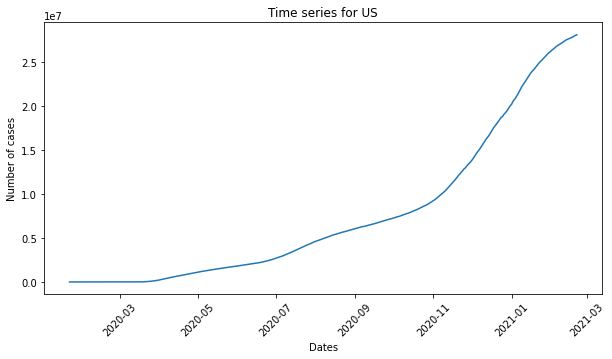

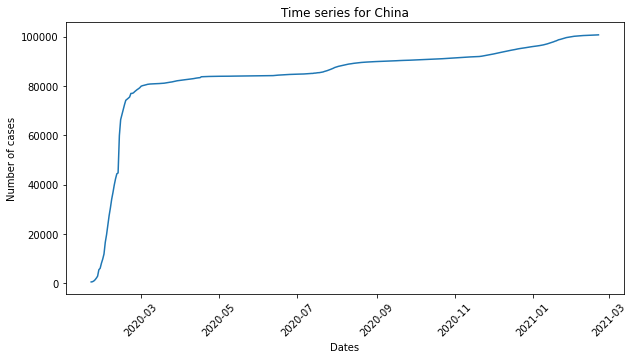

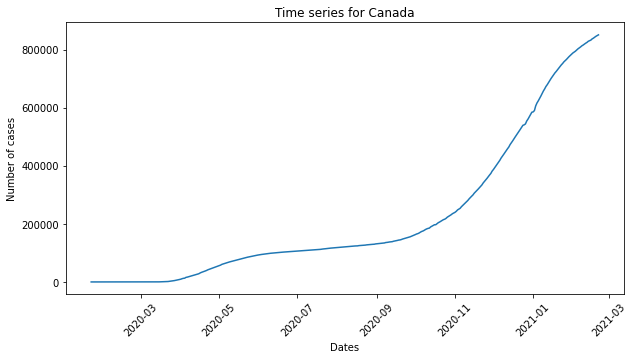

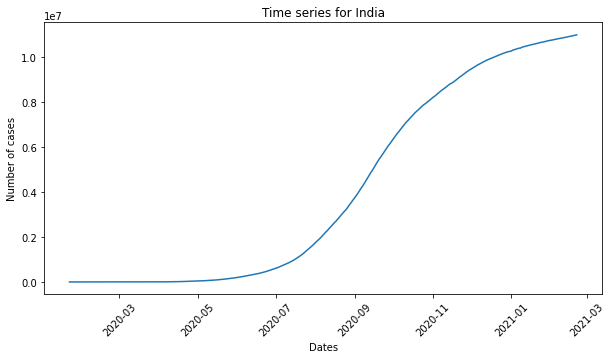

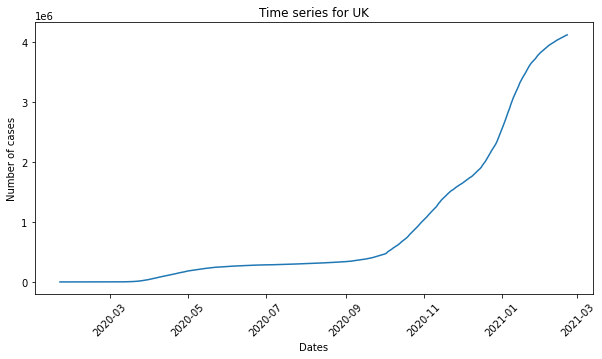

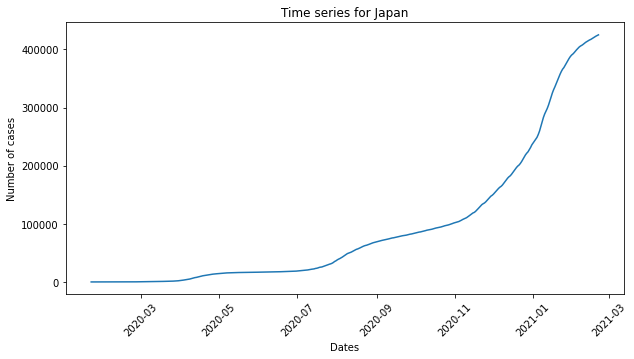

In [ ]:
#Plottint the Time-Series for specific countries
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
plt.plot_date(cases_raw_date, US, linestyle= 'solid', marker = "None")
plt.xlabel('Dates')
plt.ylabel('Number of cases')
plt.title('Time series for US')

plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
plt.plot_date(cases_raw_date, China, linestyle= 'solid', marker = "None")
plt.xlabel('Dates')
plt.ylabel('Number of cases')
plt.title('Time series for China')

plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
plt.plot_date(cases_raw_date, Canada, linestyle= 'solid', marker = "None")
plt.xlabel('Dates')
plt.ylabel('Number of cases')
plt.title('Time series for Canada')

plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
plt.plot_date(cases_raw_date, India, linestyle= 'solid', marker = "None")
plt.xlabel('Dates')
plt.ylabel('Number of cases')
plt.title('Time series for India')

plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
plt.plot_date(cases_raw_date, UK, linestyle= 'solid', marker = "None")
plt.xlabel('Dates')
plt.ylabel('Number of cases')
plt.title('Time series for UK')

plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
plt.plot_date(cases_raw_date, Japan, linestyle= 'solid', marker = "None")
plt.xlabel('Dates')
plt.ylabel('Number of cases')
plt.title('Time series for Japan')

In [ ]:
#Standardising the dataset
from sklearn.preprocessing import StandardScaler
df = cases_raw 
df_std = StandardScaler().fit_transform(df)
df_std = pd.DataFrame(df_std)
index = cases_raw.index
index = pd.DataFrame(index)
index.columns = ['countries']
fin = pd.concat([index,df_std], axis = 1)
fin.set_index('countries', inplace= True)

US_std = fin.loc['US'] 
India_std = fin.loc['India']
China_std = fin.loc['China'] 
Canada_std = fin.loc['Canada'] 
Japan_std = fin.loc['Japan'] 
UK_std = fin.loc['United Kingdom'] 


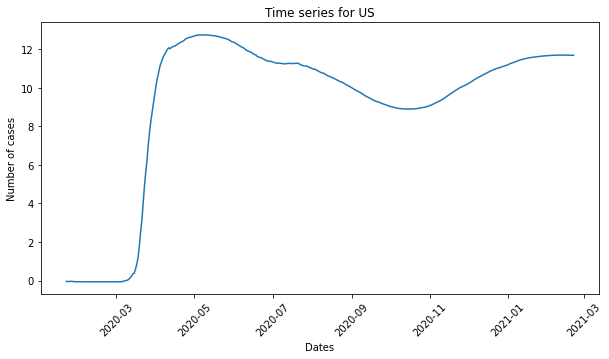

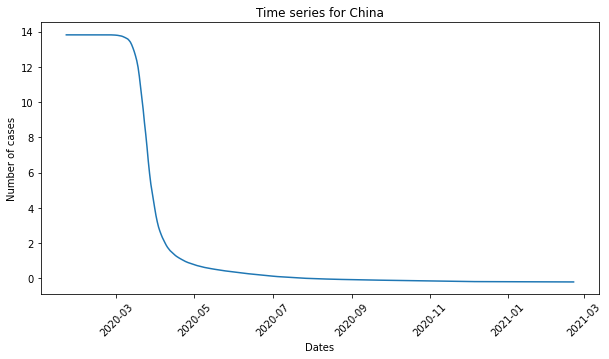

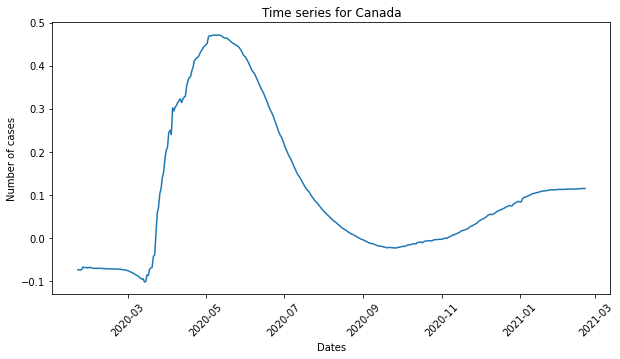

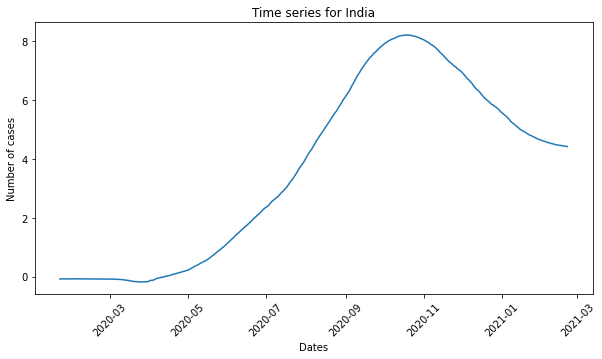

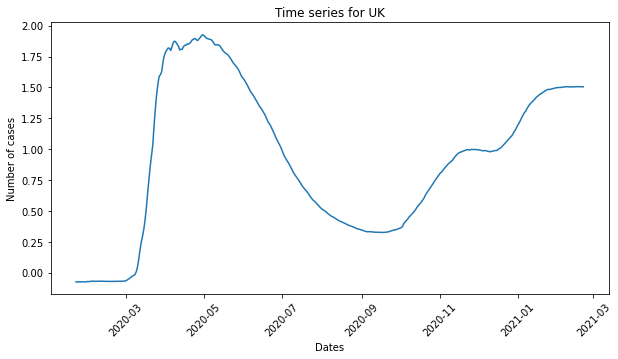

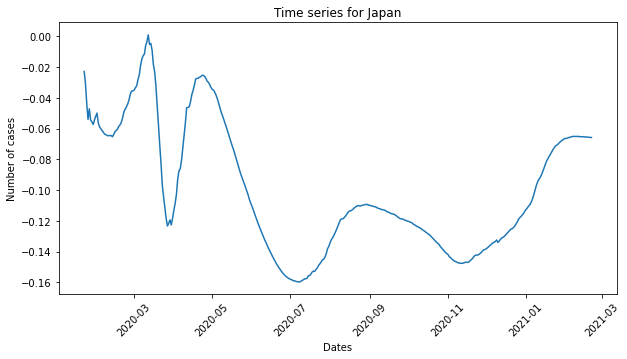

In [ ]:
#Time-Series plot after standardising the dataset
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
plt.plot_date(cases_raw_date, US_std, linestyle= 'solid', marker = "None")
plt.xlabel('Dates')
plt.ylabel('Number of cases')
plt.title('Time series for US')
plt.show()

plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
plt.plot_date(cases_raw_date, China_std, linestyle= 'solid', marker = "None")
plt.xlabel('Dates')
plt.ylabel('Number of cases')
plt.title('Time series for China')
plt.show()

plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
plt.plot_date(cases_raw_date, Canada_std, linestyle= 'solid', marker = "None")
plt.xlabel('Dates')
plt.ylabel('Number of cases')
plt.title('Time series for Canada')
plt.show()

plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
plt.plot_date(cases_raw_date, India_std, linestyle= 'solid', marker = "None")
plt.xlabel('Dates')
plt.ylabel('Number of cases')
plt.title('Time series for India')
plt.show()

plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
plt.plot_date(cases_raw_date, UK_std, linestyle= 'solid', marker = "None")
plt.xlabel('Dates')
plt.ylabel('Number of cases')
plt.title('Time series for UK')
plt.show()

plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
plt.plot_date(cases_raw_date, Japan_std, linestyle= 'solid', marker = "None")
plt.xlabel('Dates')
plt.ylabel('Number of cases')
plt.title('Time series for Japan')
plt.show()

**Discuss the trends in the standardized time-series for the US, Canada, and China. What does it mean if the curve goes up or down? What do negative and positive values mean?**

Standardizing a dataset involves rescaling the distribution of values so that the mean of the values is 0 and the standard deviation is 1. The curve goes up and down indicating that the number of new cases increases or decreases with respect to the mean. So, when the curve goes to negative value it means that the number of cases on that day is less than the mean of the dataset(number of new cases). 

This is the reason why the curve appears different and doesn't decrease in the non-standardized time-series plot.


# Part 2: Applying PCA [2 Marks]

1. Compute the covariance matrix of the dataframe. *Hint: The dimensions of your covariance matrix should be (397, 397).* **[0.25]**
2. Compute eigenvalues and eigenvectors using `np.linalg.eigh`. **[0.25]**
3. Show the effectiveness of your principal components in covering the variance of the dataset with a `scree plot`(zoom-in on the x-axis if needed). **[0.25]**
4. How many PCs do you need to cover 99\% of the dataset's variance? **[0.25]**
5. Plot the first 16 principal components (Eigenvectors) as a time series (16 subplots, on the x-axis you have dates and on the y-axis you have the value of the PC element) . **[0.5]**
6. Compare the first few PCs with the rest of them. Do you see any difference in their trend? **[0.5]**

In [ ]:
cases_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, Afghanistan to Zimbabwe
Columns: 397 entries, 2020-01-22 to 2021-02-21
dtypes: int64(397)
memory usage: 602.0+ KB


In [ ]:
df = cases_raw
df_std = StandardScaler().fit_transform(df)
n, m = df_std.shape
#Calculating Covariance and eigenvectors
C = np.dot(df_std.T, df_std) / (n-1) 
eigenValues, eigenVectors = np.linalg.eigh(C) 
#Sorting the eigenvectors based on the eigenvalues
args = (-eigenValues).argsort()
eigenValues = eigenValues[args]
eigenVectors = eigenVectors[:, args]

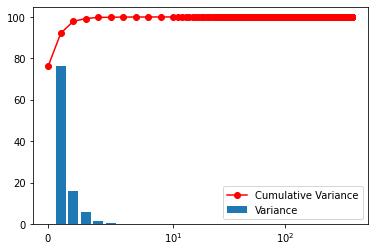

In [ ]:
eigValSum = sum(eigenValues)
Var = [eigV/eigValSum*100 for eigV in eigenValues]
cumVar = np.cumsum(Var)
#Plotting the scree plot for the dataset to check variance
plt.bar(range(1,398), Var, label='Variance')
plt.plot(cumVar, 'r-o', label='Cumulative Variance')
plt.xscale('symlog',linthreshx = 10.0)
plt.legend()
plt.show()

**How many PCs do you need to cover 99% of the dataset's variance?**

Looking at the screeplot and cumulative variance we can see that in order to get 99% of the dataset's variance we need 4 PCs

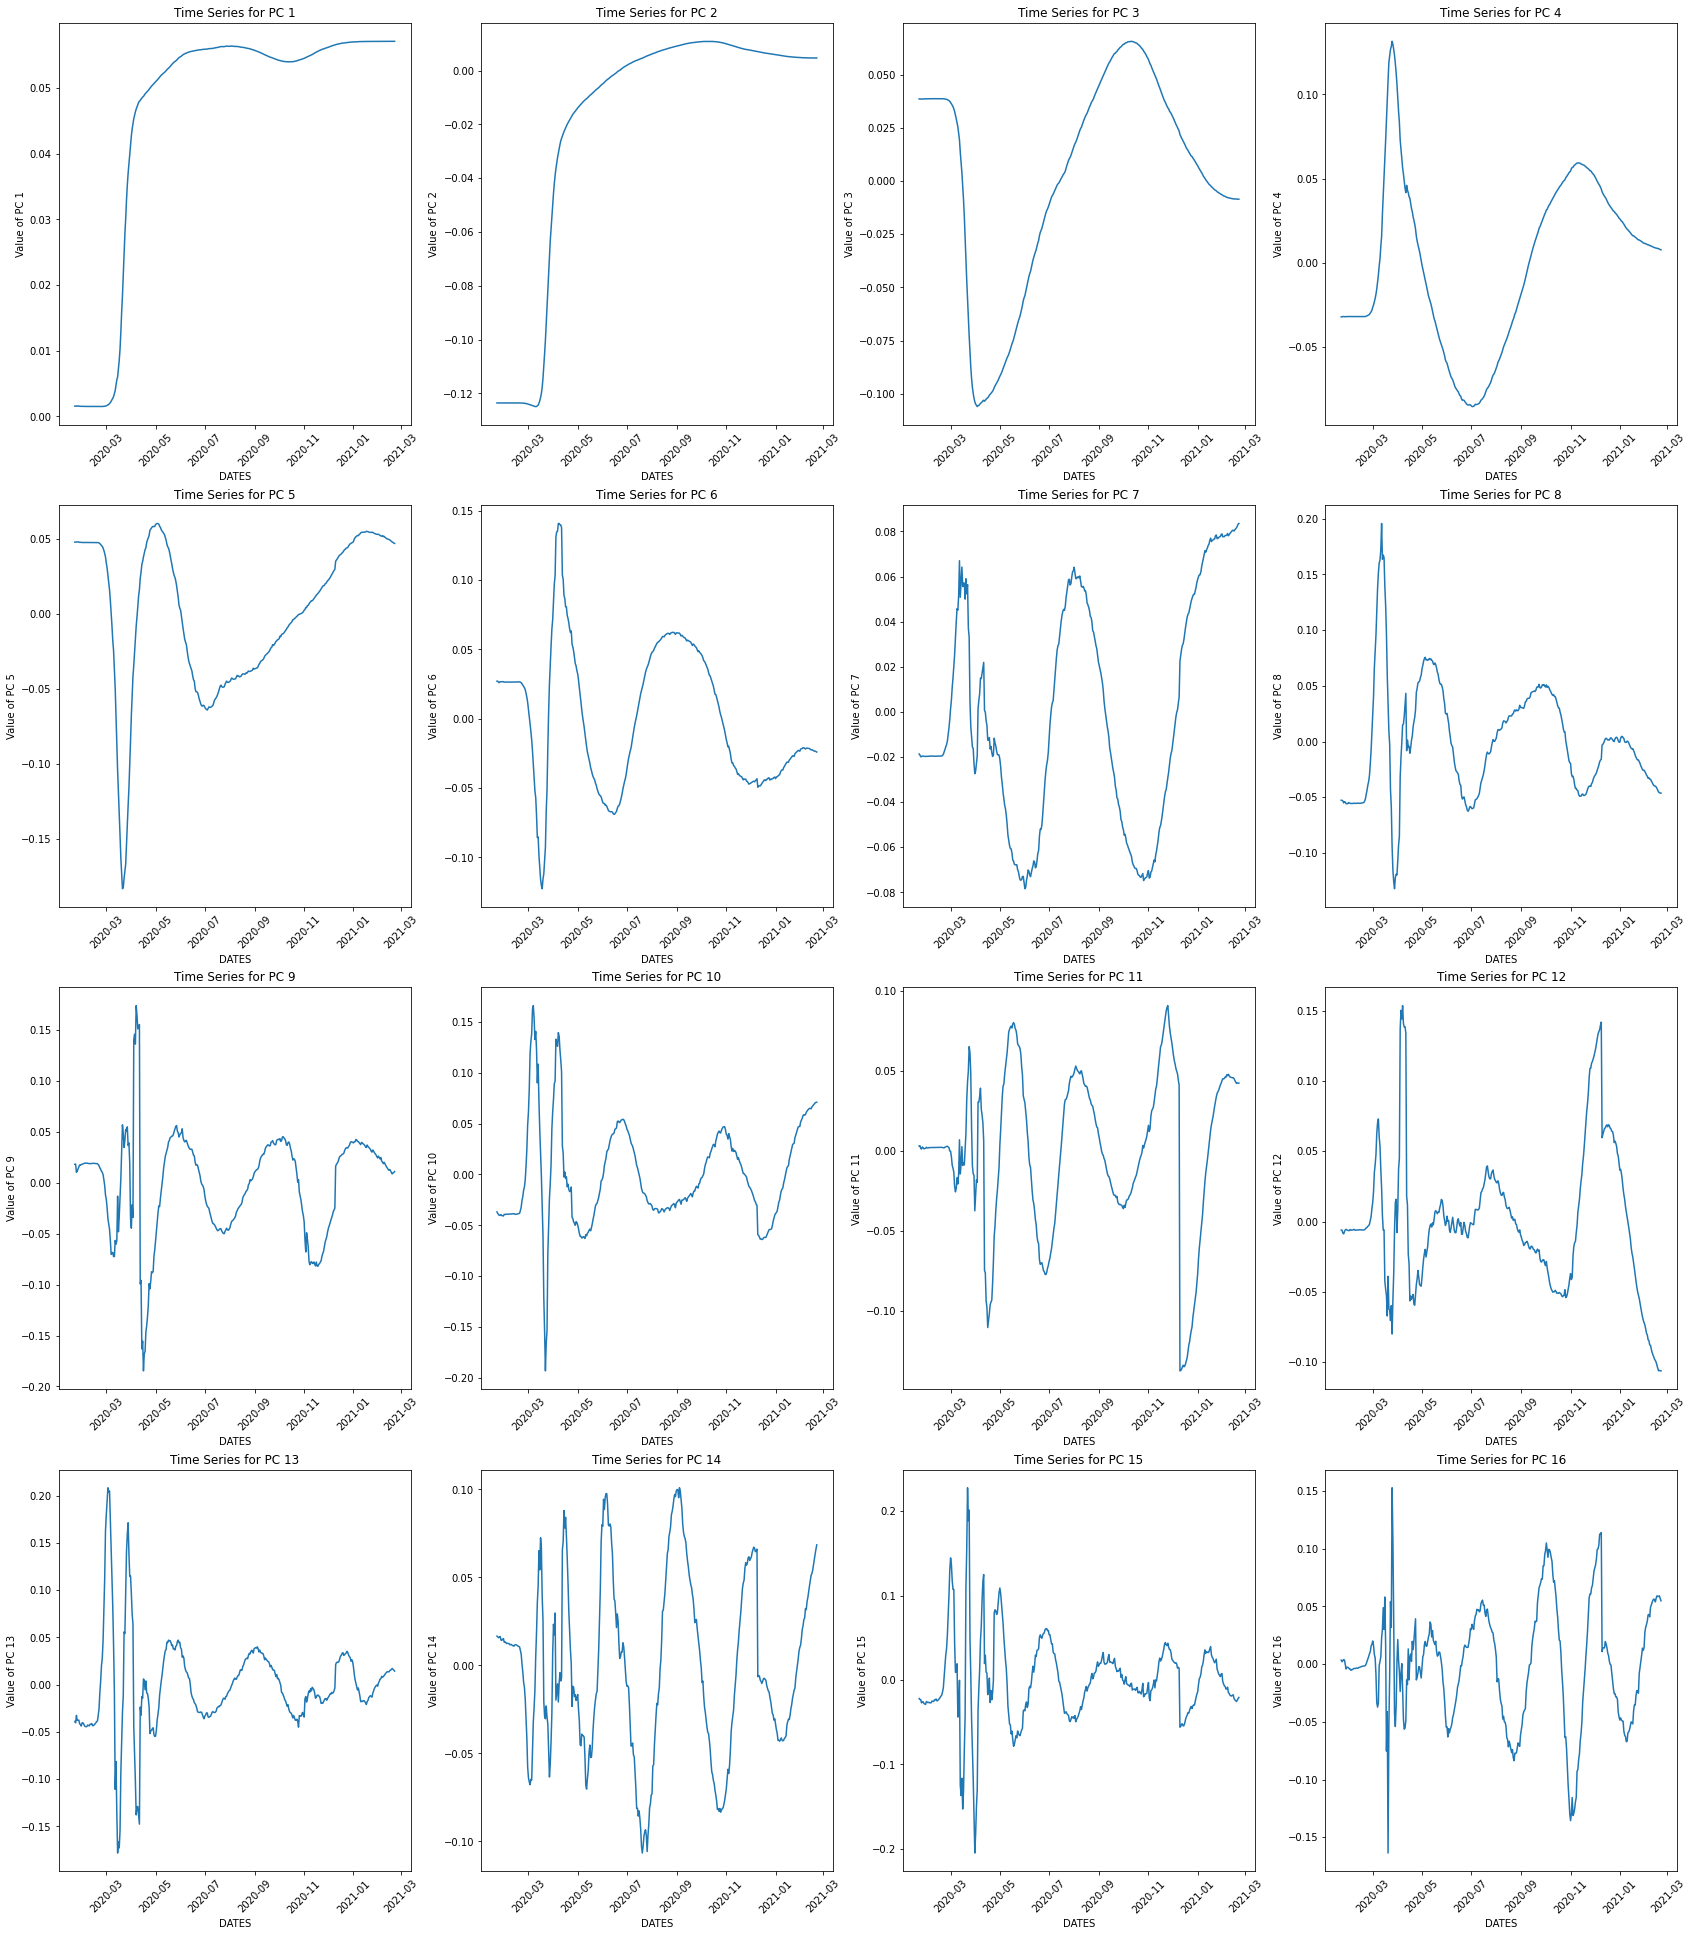

In [ ]:
#Plotting the first 16 eigenvectors as time-series
plt.figure(figsize = (29,34))
plt.xticks(rotation=45)
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.xticks(rotation=45)
  plt.plot(cases_raw_date,eigenVectors[:,i])
  plt.xlabel('DATES')
  plt.ylabel('Value of PC %d' %(i+1))
  plt.title('Time Series for PC %d' %(i+1))
plt.show()

**Compare the first few PCs with the rest of them. Do you see any difference in their trend?** 


Each PCs have one dimension, and the mid-point has value 0. The sign positive or negative tells us the direction and magnitude of the variable. From the first few plots we can see that the eigenvectors are mostly going in just one direction throughout the time period. Whereas, the later eigenvectors are more varied changing magnitude and direction as time went on.  

# Part 3: Data reconstruction [4 Marks]

Create a function that:

*   Accepts a country name as an input (add other arguments if needed).
*   Plots 4 figures:
1.   The original and standardized time-series for the specified country. **[0.5]**
2.   The incremental reconstruction of the **original** (not standardized) time-series for the specified country in a single plot. **[1.5]**
  * You should at least show 5 curves in a figure for incremental reconstruction. For example, you can pick the following (or any other combination that you think is reasonable): 
      * Reconstruction with only PC1
      * Reconstruction with both PC1 and PC2
      * Reconstruction with PC1 to PC4 (First 4 PCs)
      * Reconstruction with PC1 to PC8 (First 8 PCs)
      * Reconstruction with PC1 to PC16 (First 16 PCs)

  * Hint: you need to compute the reconstruction for the standardized time-series first, and then scale it back to the original (non-standardized form) using the StandardScaler `inverse_transform` [help...](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.inverse_transform)
3.   The residual error for each of the 5 incremental reconstructions with respect to the original time-series. **[0.5]**
  * Hint: You are plotting how much error do we have for reconstructing each day. On the x-axis, you have dates, and on the y-axis, the residual error. 
4.   The RMSE of the reconstruction as a function of the number of included components (x-axis is the number of components and y-axis is the RMSE). **[1]**

Test your function using the `US`, `Canada`, and `China` as inputs. **[0.5]**


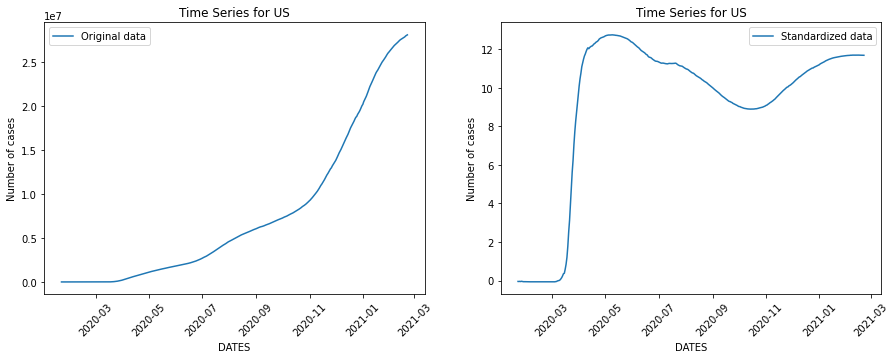

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:94: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

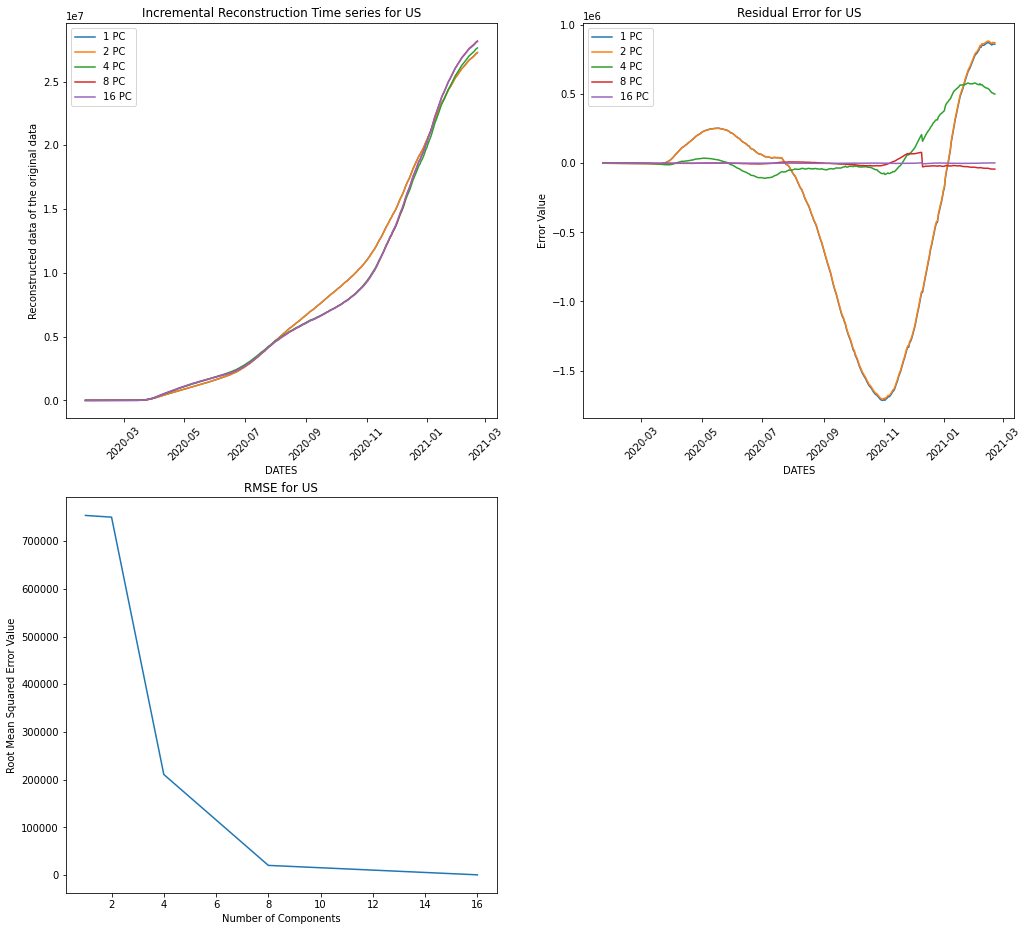

In [ ]:
def country_pca(country, data):
  #Standardising the entire dataset
  df = data
  df_std = StandardScaler().fit_transform(df)
  n, m = df_std.shape

#Computing the covariance matrix
  C = np.dot(df_std.T, df_std) / (n-1) 
  eigenValues, eigenVectors = np.linalg.eigh(C)

#Sorting the eigenvectors based on the eigenvalues in descending order
  eigenValues, eigenVectors = np.linalg.eigh(C) 
  args = (-eigenValues).argsort()
  eigenValues = eigenValues[args]
  eigenVectors = eigenVectors[:, args]

  #Adding the countries as the index of the standardised dataset
  df_std = pd.DataFrame(df_std)
  index = data.index
  index = pd.DataFrame(index)
  index.columns = ['countries']
  fin = pd.concat([index,df_std], axis = 1)
  fin.set_index('countries', inplace= True)

  dates = pd.to_datetime(data.T.index)

#Plotting the time-series chart for the specific country
  df_c = data.loc[country]
  df_c_std = fin.loc[country]
  #days = range(1,398)
  plt.figure(figsize = (15,5))
  plt.subplot(1,2,1)
  plt.xticks(rotation=45)
  plt.plot_date(dates,df_c, label = 'Original data', linestyle = "solid", marker = "None")
  plt.xlabel('DATES')
  plt.ylabel('Number of cases')
  plt.title('Time Series for %s' %country)
  plt.legend()
  plt.subplot(1,2,2)
  plt.xticks(rotation=45)
  plt.plot_date(dates,df_c_std, label = 'Standardized data', linestyle = "solid", marker = "None")
  plt.xlabel('DATES')
  plt.ylabel('Number of cases')
  plt.title('Time Series for %s' %country)
  plt.legend()
  plt.show()

  from sklearn import preprocessing
  from sklearn.metrics import mean_squared_error
  df = data
  df = pd.DataFrame(df)
  scaler = preprocessing.StandardScaler().fit(df)
  df_std1 = scaler.transform(df)
#Creating the projection and reconstruction of the data for a particular country
  PC_count = 1
  rmse = []
  plt.figure(figsize = (17,16))
  while PC_count <=16:
    W = eigenVectors[:, 0:PC_count]
    projX = np.dot(df_std1, W)
    ReconX = np.dot(projX, W.T)
    inv = scaler.inverse_transform(ReconX)
    inv = pd.DataFrame(inv)
    index = data.index
    index = pd.DataFrame(index)
    index.columns = ['countries']
    fin_inv = pd.concat([index,inv], axis = 1)
    fin_inv.set_index('countries', inplace= True)

#Creating the estimated/predicted value and calculating the residual error
    est_value = fin_inv.loc[country]
    true_value = data.loc[country]
    est_value = pd.DataFrame(est_value)
    true_value = pd.DataFrame(true_value)
    true_value['numbers'] = range(397) 
    true_value.set_index('numbers', inplace=True)
    res_error = (true_value - est_value)
    res_error = pd.DataFrame(res_error)

#Calculating the RMSE value
    rmse1 = np.sqrt(mean_squared_error(est_value,true_value))
    rmse.append(rmse1)

#Plotting the incremental reconstruction of the original data 
    plt.subplot(2,2,1)
    plt.xticks(rotation=45)  
    plt.plot(dates, fin_inv.loc[country], label = '%d PC' %PC_count, linestyle = "solid", marker = "None")
    plt.xlabel('DATES')
    plt.ylabel('Reconstructed data of the original data')
    plt.title('Incremental Reconstruction Time series for %s' %country)
    plt.legend()

#Plotting the residual error
    plt.subplot(2,2,2)  
    plt.xticks(rotation=45)  
    plt.plot_date(dates, res_error, label = '%d PC' %PC_count, linestyle = "solid", marker = "None")
    plt.xlabel('DATES')
    plt.ylabel('Error Value')
    plt.title('Residual Error for %s' %country)
    plt.legend()

    PC_count += PC_count 

#Plotting the RMSE value
  nofcomp = [1,2,4,8,16]
  plt.subplot(2,2,3)  
  plt.plot(nofcomp, rmse)
  plt.xlabel('Number of Components')
  plt.ylabel('Root Mean Squared Error Value')
  plt.title('RMSE for %s' %country)
  plt.show()
  return


country_pca('US', cases_raw)



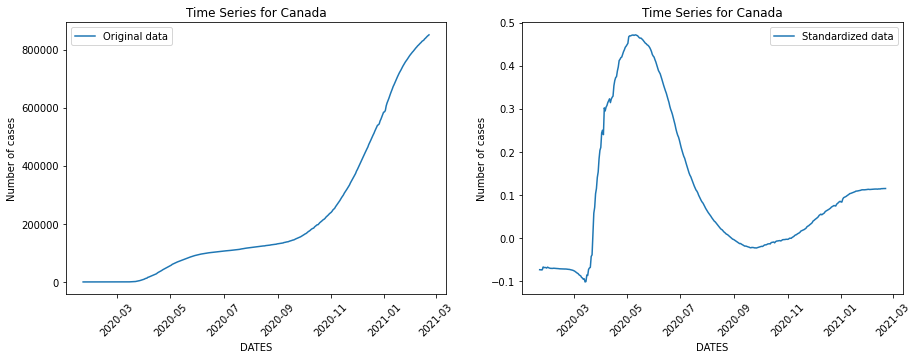

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:94: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

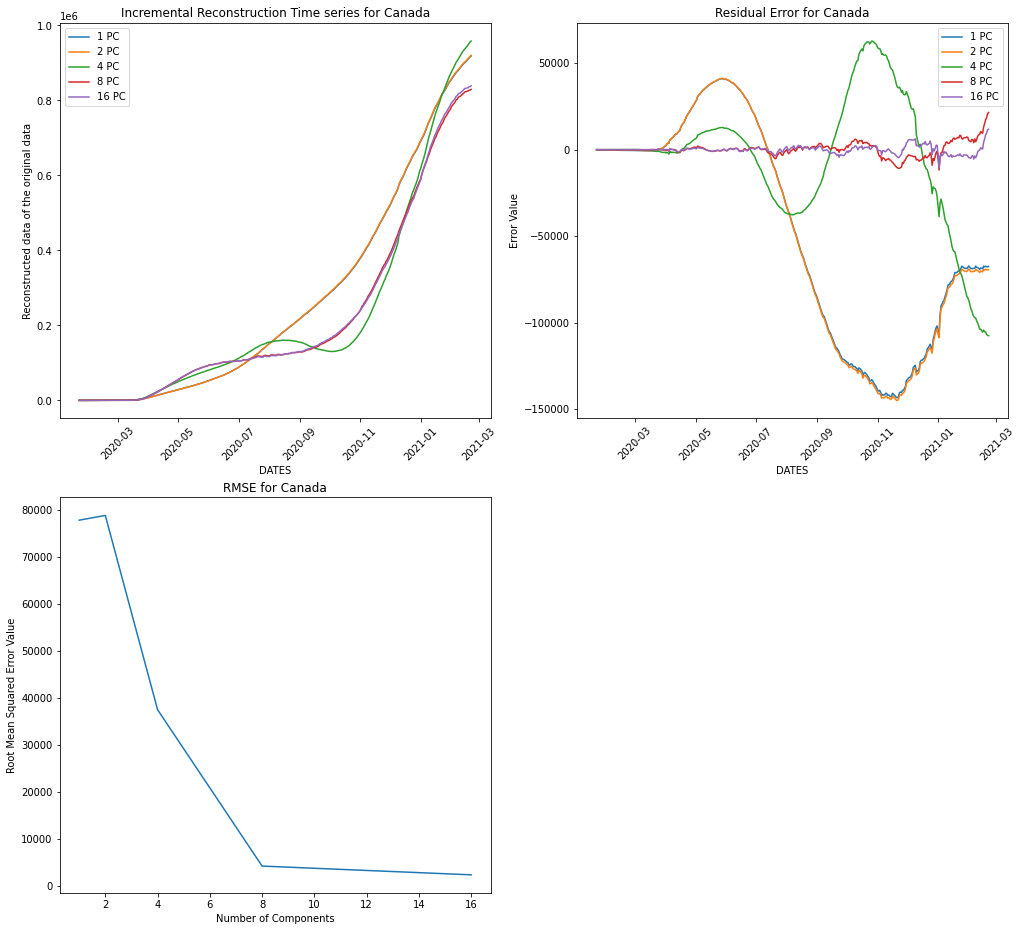

In [ ]:
country_pca('Canada', cases_raw)


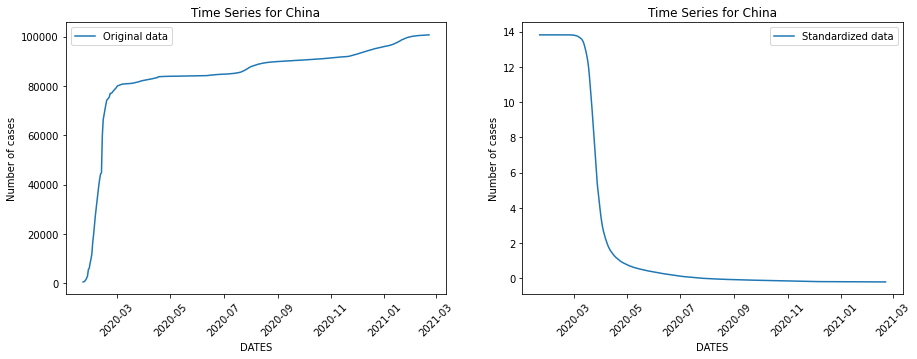

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:94: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

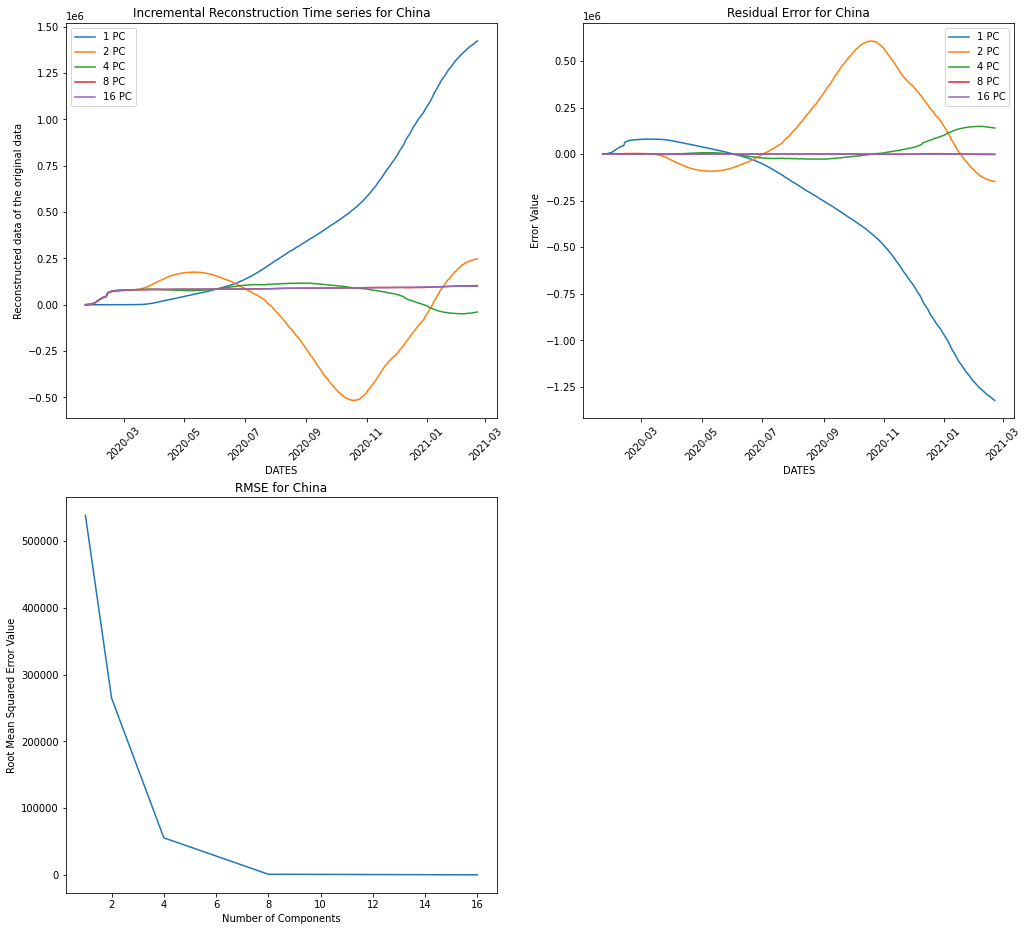

In [ ]:
country_pca('China', cases_raw)

# Part 4: Time-series analysis on recovered cases [2 Marks]

Call the function that you designed in *Part 3* with this new dataset. To do that, you'll first need to preprocess the data (follow the steps we have in Parts 1 and 2 ----don't need to plot anything) and prepare the data for calling the Part 3 function **[1]**. Test your function with the new dataset, with the `US`, `Canada`, and `China`. **[1]**


In [ ]:
import pandas as pd
recovered_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/recoverd_feb_21.csv', 
    index_col=0,
    thousands=','
)

In [ ]:
#Pre-Processing the dataset as both US and Sweden have 0's making the dataset inaccurate
#Converting the zeroes to Nan to rectify the error in the values of US and Sweden
recovered_mod = recovered_raw.replace(0, np.NaN)
recovered_mod2 = recovered_mod.T

In [ ]:
#Converting the index into datetime format to use interpolate
recovered_mod2.index = pd.to_datetime(recovered_mod2.index)


#Interpolating by backfill method to fill in the nan values
recovered_mod2 = recovered_mod2.interpolate(method="bfill")

#Interpolating the remaining missing values based on the dates/time
recovered_mod2 = recovered_mod2.interpolate(method="time")


#As Sweden is fully 0 therefore I used the forward fill method to fill it with the previous country values
recovered_mod2 = recovered_mod2.fillna(method="ffill",axis="columns")


recovered_mod2 = recovered_mod2.T

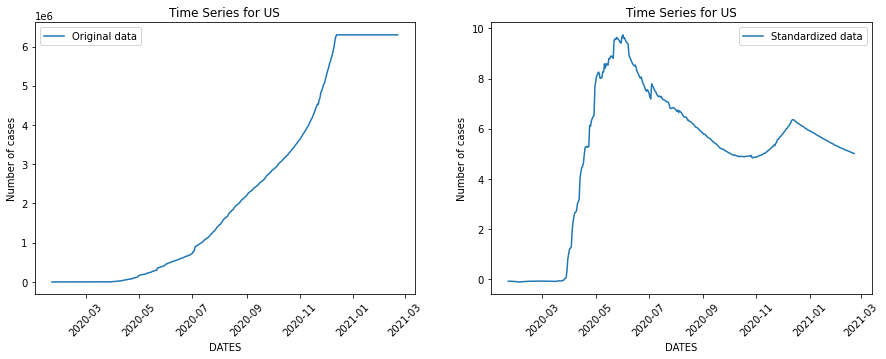

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:94: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

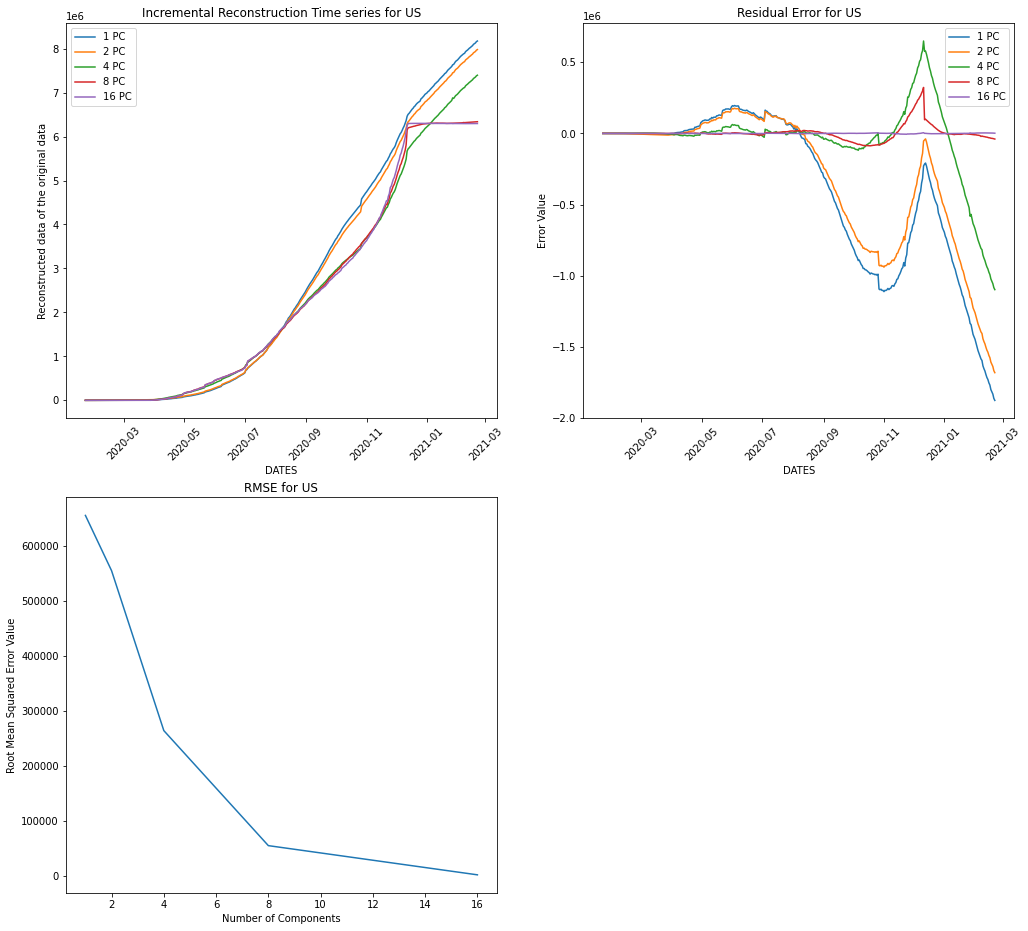

In [ ]:
country_pca('US', recovered_mod2)

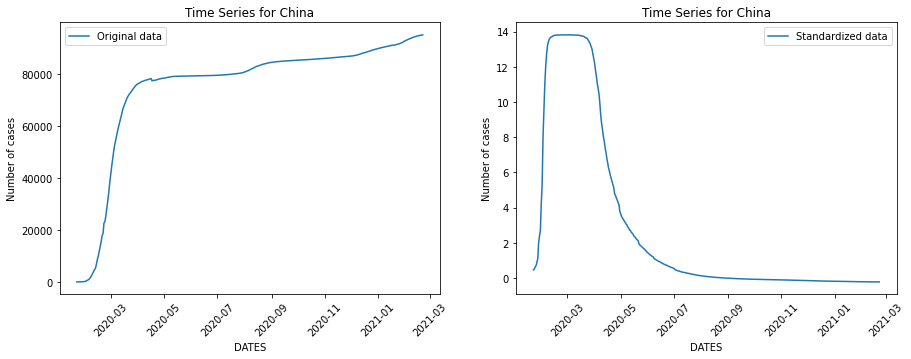

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:94: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

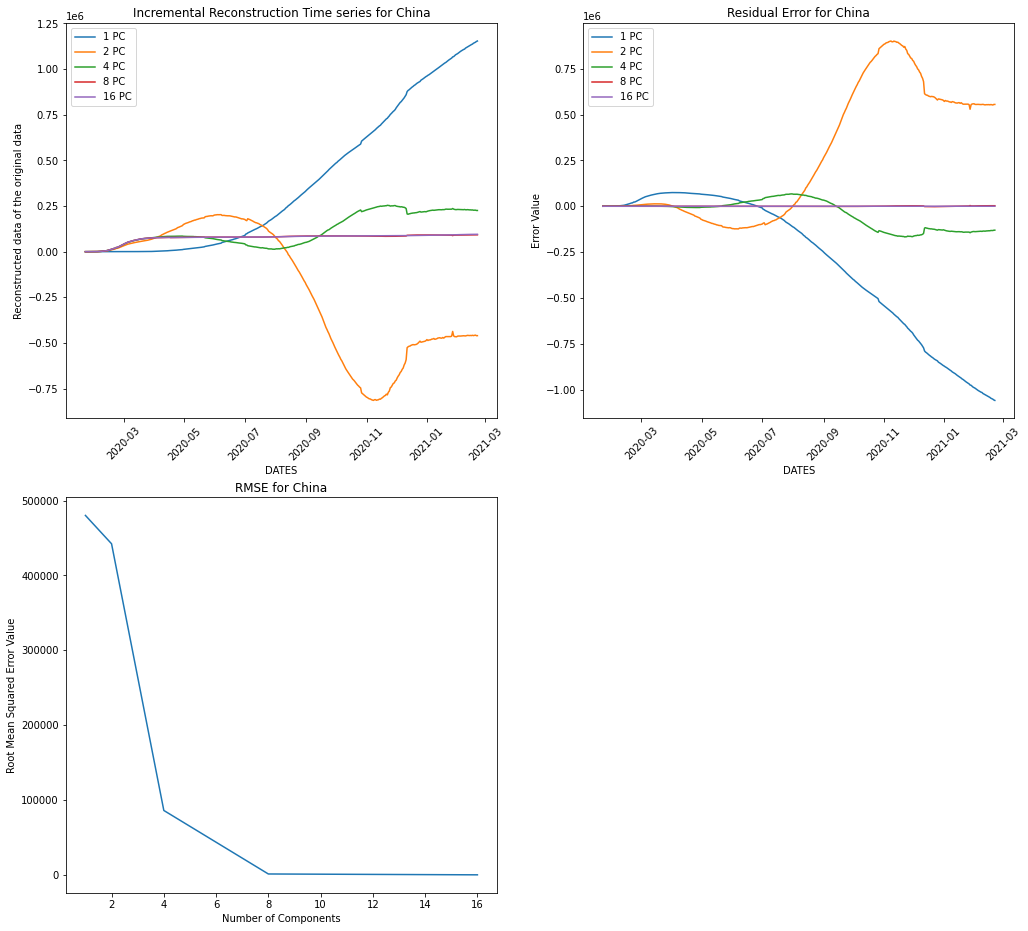

In [ ]:
country_pca('China', recovered_mod2)

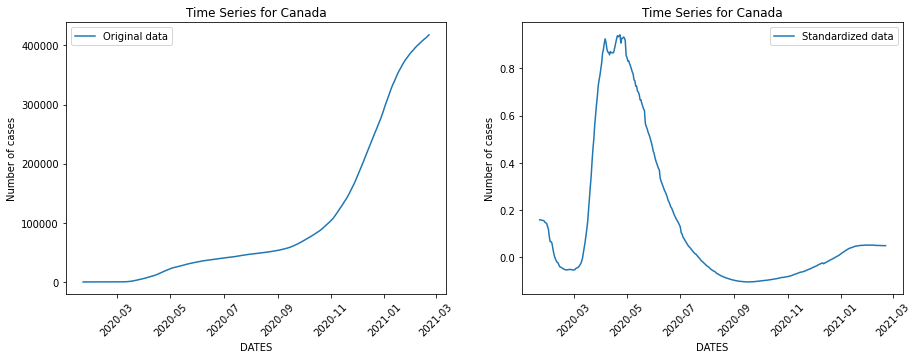

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:94: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

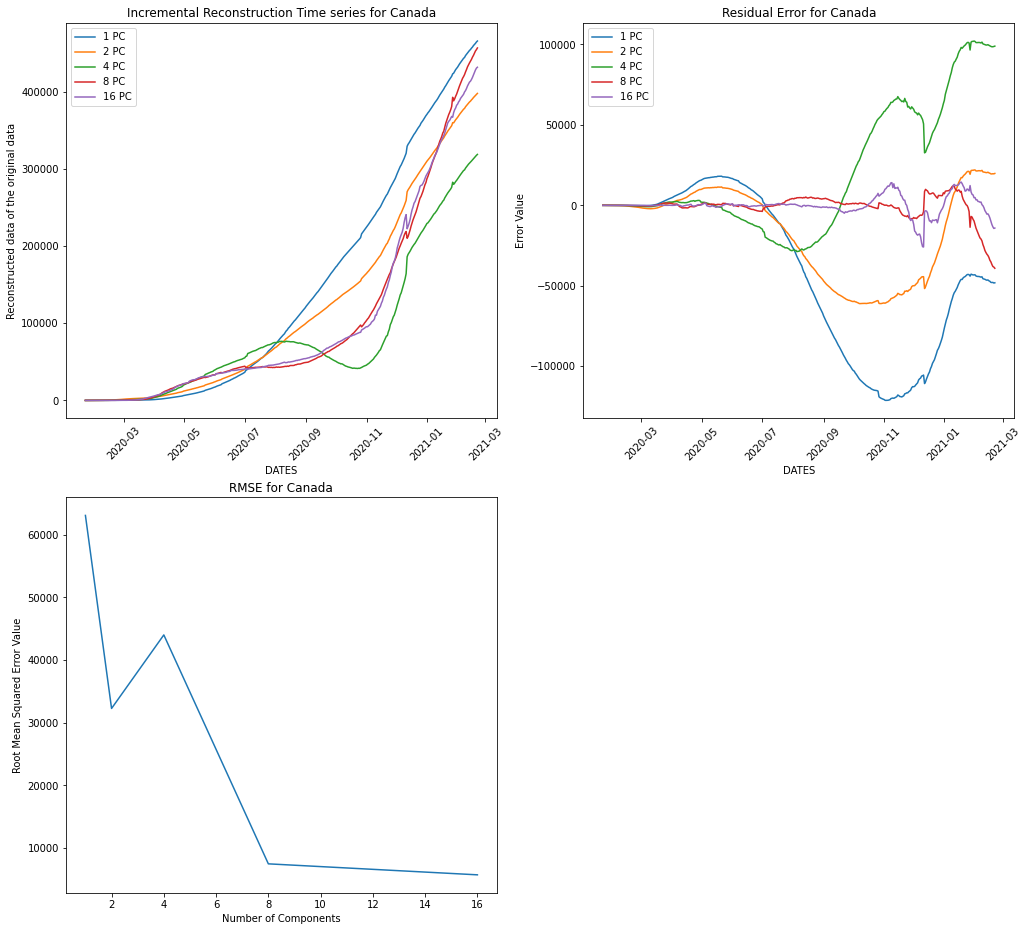

In [ ]:
country_pca('Canada', recovered_mod2)

# Part 5: PCA on the dimension of the samples [2 Marks]

Since the number of features (dates) in our dataset is greater than the number of samples (countries), we can apply PCA on the sample dimension for faster computation. 
Repeat part 4, where you apply PCA using this technique. Compare the results and report your findings. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

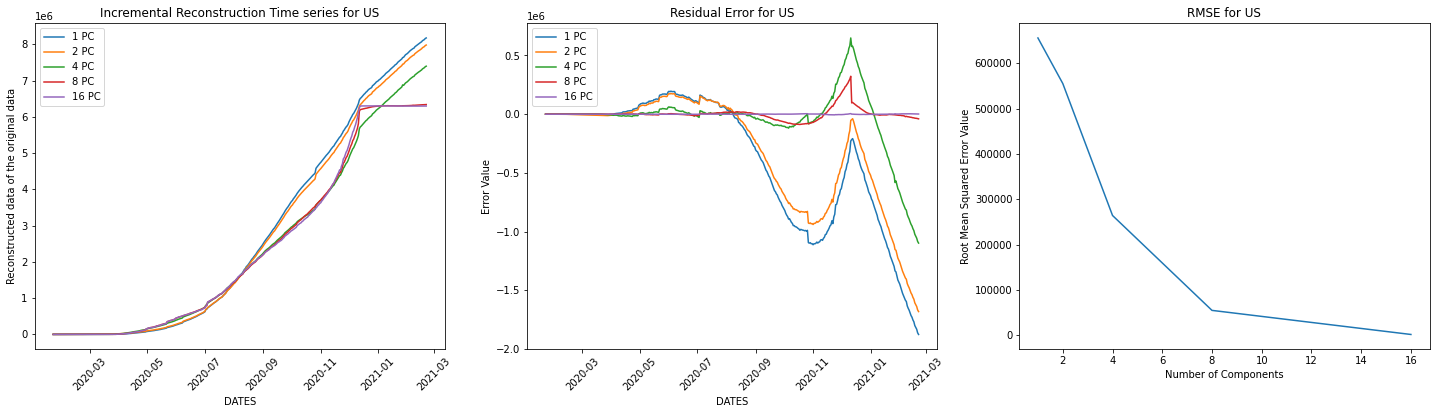

In [ ]:
def pca_sample(country, data):
  from sklearn.metrics import mean_squared_error
  from sklearn import preprocessing
  df = data
  df = pd.DataFrame(df)
  scaler = preprocessing.StandardScaler().fit(df)
  df_std = scaler.transform(df)
  dates = pd.to_datetime(data.T.index)
  n, m = df_std.shape
#Calculating the Covariance using the sample instead of the features for faster computation
  C = np.dot(df_std,df_std.T) / (n-1) 
  eigenValues1, eigenVectors1 = np.linalg.eigh(C)
  eigenVectors1 = np.dot(df_std.T, eigenVectors1)
  for i in range(n):
    eigenVectors1[:,i] = eigenVectors1[:, i] / np.linalg.norm(eigenVectors1[:, i])

#Sorting the eigenvectors 
  idx = np.argsort(-eigenValues1)
  eigenValues1 = eigenValues1[idx]
  eigenVectors1 = eigenVectors1[:, idx]
  rmse2 = []
  PC_count = 1
  plt.figure(figsize=(25,6))
  while PC_count <=16:
#Creating the projection and reconstruction of the data for a particular country
    W = eigenVectors1[:, 0:PC_count]
    projX = np.dot(df_std, W)
    ReconX = np.dot(projX, W.T)
    inv = scaler.inverse_transform(ReconX)
    inv = pd.DataFrame(inv)
    index = recovered_raw.index
    index = pd.DataFrame(index)
    index.columns = ['countries']
    fin_recon = pd.concat([index,inv], axis = 1)
    fin_recon.set_index('countries', inplace= True)

#Plotting the incremental reconstruction of the original data 
    plt.subplot(1,3,1)
    plt.xticks(rotation=45)
    plt.plot(dates, fin_recon.loc[country], label = '%d PC' %PC_count, linestyle = "solid", marker = "None")
    plt.xlabel('DATES')
    plt.ylabel('Reconstructed data of the original data')
    plt.title('Incremental Reconstruction Time series for %s' %country)
    plt.legend()

#Creating the estimated/predicted value and calculating the residual error 
    est_value1 = fin_recon.loc[country]
    true_value1 = recovered_mod2.loc[country]
    est_value1 = pd.DataFrame(est_value1)
    true_value1 = pd.DataFrame(true_value1)
    true_value1['numbers'] = range(397)
    true_value1.set_index('numbers', inplace=True)
    res_error1 = (true_value1 - est_value1)
    res_error1 = pd.DataFrame(res_error1)

    rmse = np.sqrt(mean_squared_error(est_value1,true_value1))
    rmse2.append(rmse)

#Plotting the residual error
    plt.subplot(1,3,2)
    plt.xticks(rotation=45)
    plt.plot(dates, res_error1, label = '%d PC' %PC_count, linestyle = "solid", marker = "None")
    plt.xlabel('DATES')
    plt.ylabel('Error Value')
    plt.title('Residual Error for %s' %country)
    plt.legend()
    PC_count += PC_count 

#Plottint the RMSE graph
  plt.subplot(1,3,3)
  nofcomp1 = [1,2,4,8,16]
  plt.plot(nofcomp1, rmse2)
  plt.xlabel('Number of Components')
  plt.ylabel('Root Mean Squared Error Value')
  plt.title('RMSE for %s' %country)
  plt.show()
  return


pca_sample('US', recovered_mod2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

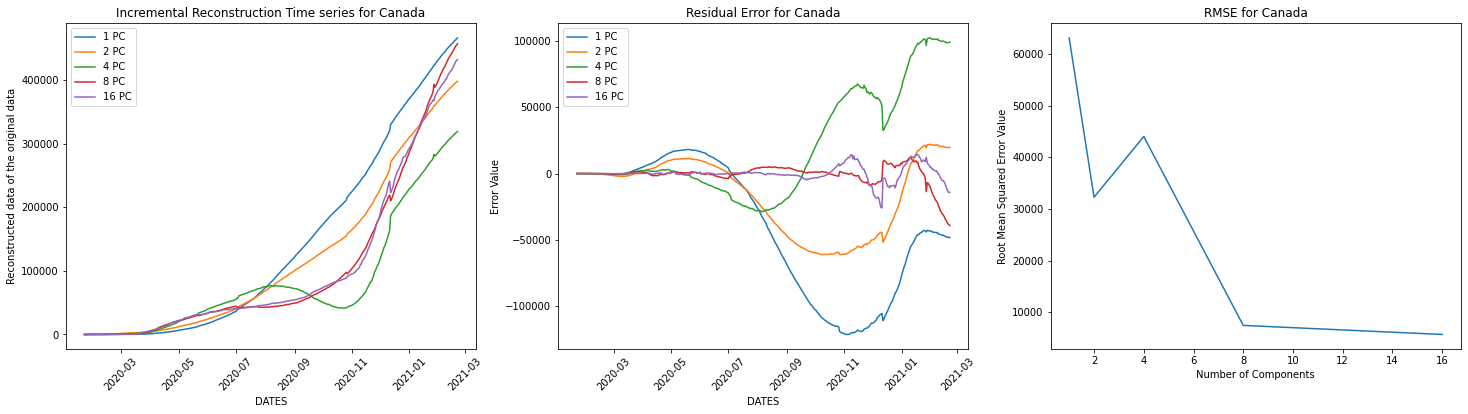

In [ ]:
pca_sample('Canada', recovered_mod2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

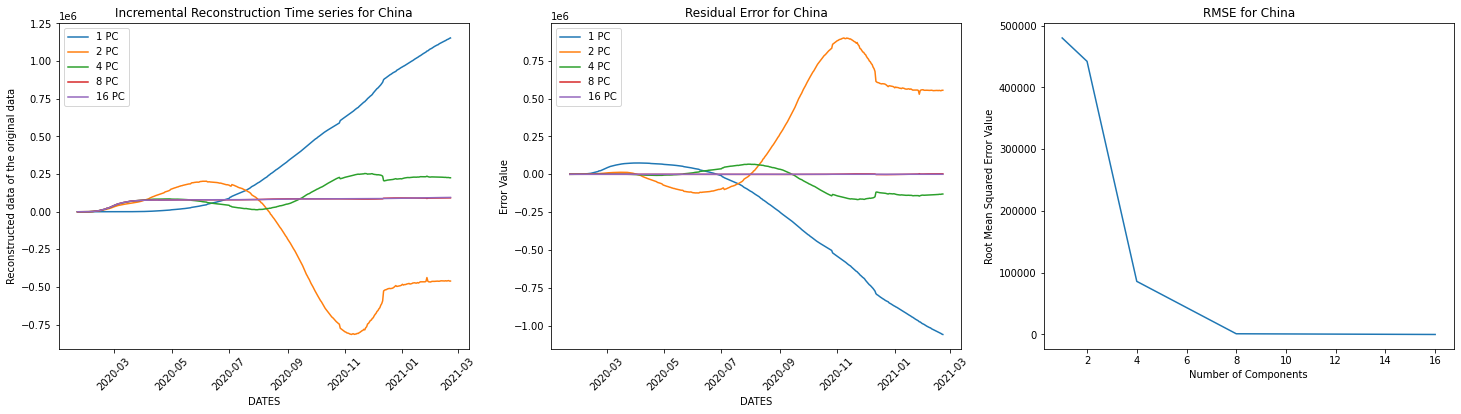

In [ ]:
pca_sample('China', recovered_mod2)

**Compare the results and report your findings**

After computing the PCA with the samples instead of the features the results are the same as before in part 4(as expected). This method is done to speed up the computation as the system doesn't have to compute a large number of features. It is good to do this when you have a large number of features compared to samples in order to conserve resources and speed up the process.

# Part 6: MNIST dataset [3 Marks]
MNIST is a dataset for hand-written digit recognition. 
Each image in MNIST has 28x28 pixels which can be represented in an array with 784 elements. In this part, we are going to use PCA to compress these images. The $x$ matrix below has 1000 images.
* Compute the covariance of the dataframe and perform eigendecomposition.  **[0.5]**
* Plot the first 10 eigenvectors (as images similar to eigenfaces). What trends do you observe? **[0.5]**
* Create a function that requires an argument $n$ and plots a random image from the dataset, as well as a reconstruction with the first $n$ th principal components. **[0.5]**
* Run your function a few times, and determine how many components are required so that we (humans!) can identify the digits. **[0.5]**
* Assume you want to share this dataset with someone else. Instead of directly giving him the whole dataset, you can share the eigenvectors (some of them) and projections with him, and he can do a dot product to get the reconstructions.  Based on the number of components that you found in the last step, what would be the compression ratio for a dataset with 1000 images? **[1]**
  * Hint: compare the dataset size with a case where we only use principal components and projections and also don't forget to add the mean face (vector).

In [ ]:
import math
import random
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
x = mnist.data[0:1000]
y = mnist.target[0:1000]

Label is: 4


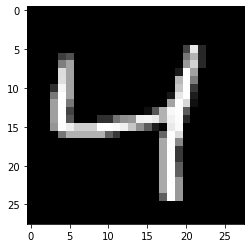

In [ ]:
import matplotlib.pyplot as plt 
plt.gray() 
plt.imshow(x[2].reshape(28,28)) 
print ("Label is:", y[2])
plt.show() 

In [ ]:
def getBasisCountThatPreservesVariance(eigenValues, variance=0.98):
  for idx, cumulativeSum in enumerate(np.cumsum(eigenValues) / np.sum(eigenValues)):
    if cumulativeSum > variance:
      return idx
        


In [ ]:
n, d = x.shape
mean = x.mean(axis=0)
X = x - mean
#Computing the covariance of the dataframe and performing eigendecomposition
C = np.dot(X.T,x) / (n-1) 
eigenValues, eigenVectors = np.linalg.eigh(C)
idx = np.argsort(-eigenValues)
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:, idx]

numOfBasis = getBasisCountThatPreservesVariance(eigenValues)
print('Number of useful eigenBasis are: ', numOfBasis)
eigenValues = eigenValues[0:numOfBasis].copy()
eigenVectors = eigenVectors[:, 0:numOfBasis].copy()

Number of useful eigenBasis are:  213


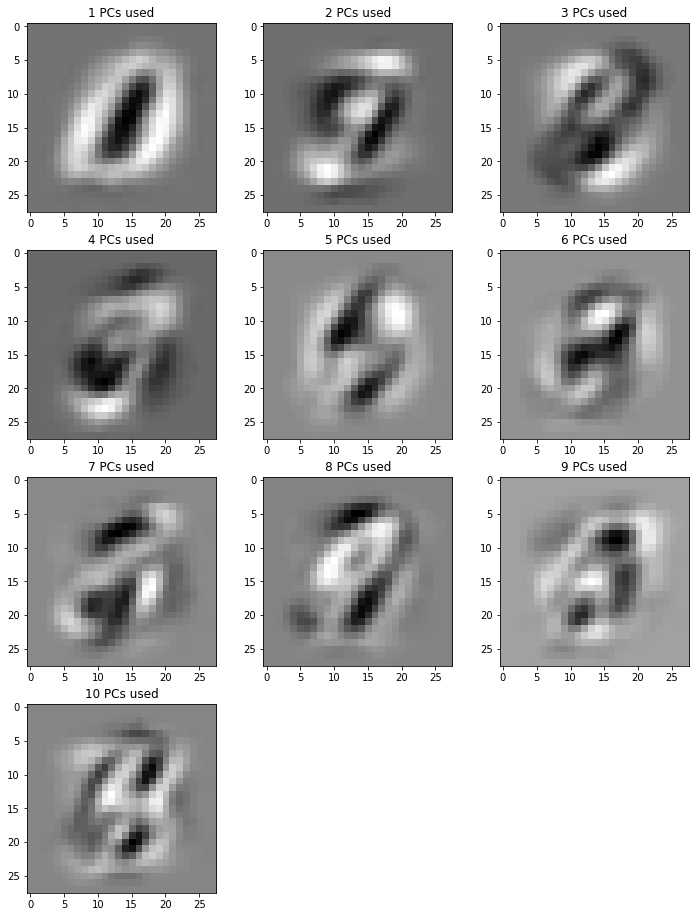

In [ ]:
#Plotting the first 10 eigenvectors
COUNT = 10
ROWS = math.ceil(COUNT/3)
fig = plt.figure(figsize=(12, ROWS * 4))
for i in range(0, COUNT):
    plt.subplot(ROWS, 3, i+1)
    plt.imshow(eigenVectors[:, i].reshape(28, 28), cmap = plt.cm.gray)
    plt.title('%d PCs used'%(i+1))

In [ ]:
def image_pca(numpcs):
  image = random.randint(1,999) #generating a random image
  print ("Label is:", y[image])
  plt.imshow(x[image].reshape(28,28), cmap=plt.cm.gray)
  plt.show()
  n, d = x.shape
  mean = x.mean(axis=0)
  X = x - mean 
  if n > d:
    C = np.dot(X.T,x) / (n-1) 
    eigenValues, eigenVectors = np.linalg.eigh(C)
  else:
    C = np.dot(X,X.T) / (n-1) 
    eigenValues, eigenVectors = np.linalg.eigh(C)
    eigenVectors = np.dot(X.T, eigenVectors)
    for i in range(n):
      eigenVectors[:,i] = eigenVectors[:, i] / np.linalg.norm(eigenVectors[:, i])           

#sorting eigenVectors in descending order by their eigenValue
  idx = np.argsort(-eigenValues)
  eigenValues = eigenValues[idx]
  eigenVectors = eigenVectors[:, idx]
      
  numOfBasis = getBasisCountThatPreservesVariance(eigenValues)
  eigenValues = eigenValues[0:numOfBasis].copy()
  eigenVectors = eigenVectors[:, 0:numOfBasis].copy()
#Creating the reconstructed image
  COUNT = numpcs 
  reconImages = []
  for numEvs in range (1, COUNT+1):
      proj = np.dot((x[image].reshape(1, -1) - mean), eigenVectors[:, 0:numEvs]) 
      recon = np.dot(proj, (eigenVectors[:, 0:numEvs]).T) + mean 
      reconImages.append(recon.reshape(x[0].shape))

#Plotting the PCs of the reconstructed image
  ROWS = math.ceil(COUNT/3)
  fig = plt.figure(figsize=(12, ROWS * 4))
  for i in range(0, COUNT):
      plt.subplot(ROWS, 3, i+1)
      plt.imshow(reconImages[i].reshape(28,28), cmap = plt.cm.gray)
      plt.title('%d PCs used'%(i+1))
  return

Label is: 9


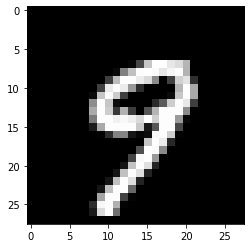

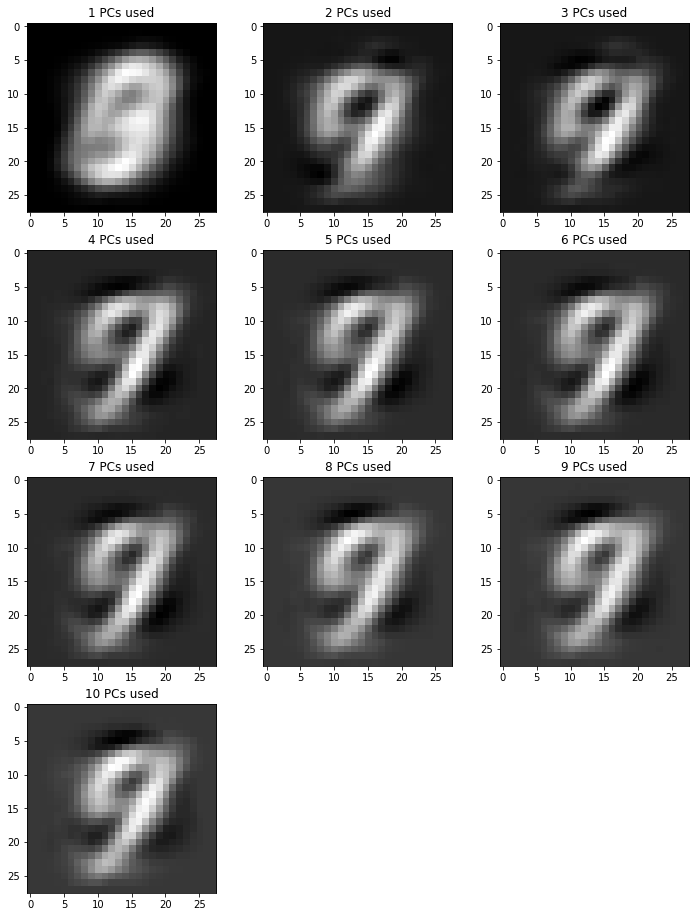

In [ ]:
image_pca(10)

Label is: 8


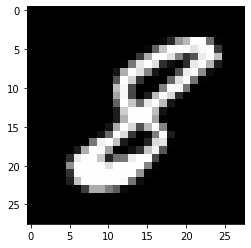

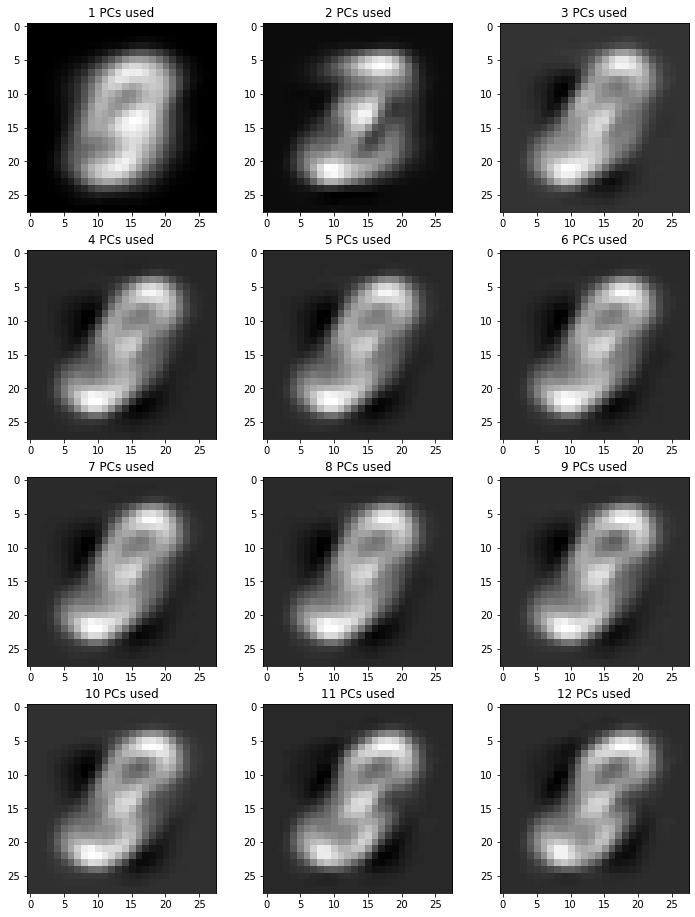

In [ ]:
image_pca(12)

Label is: 2


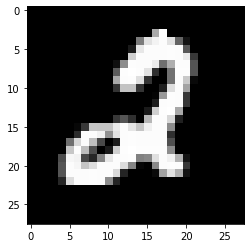

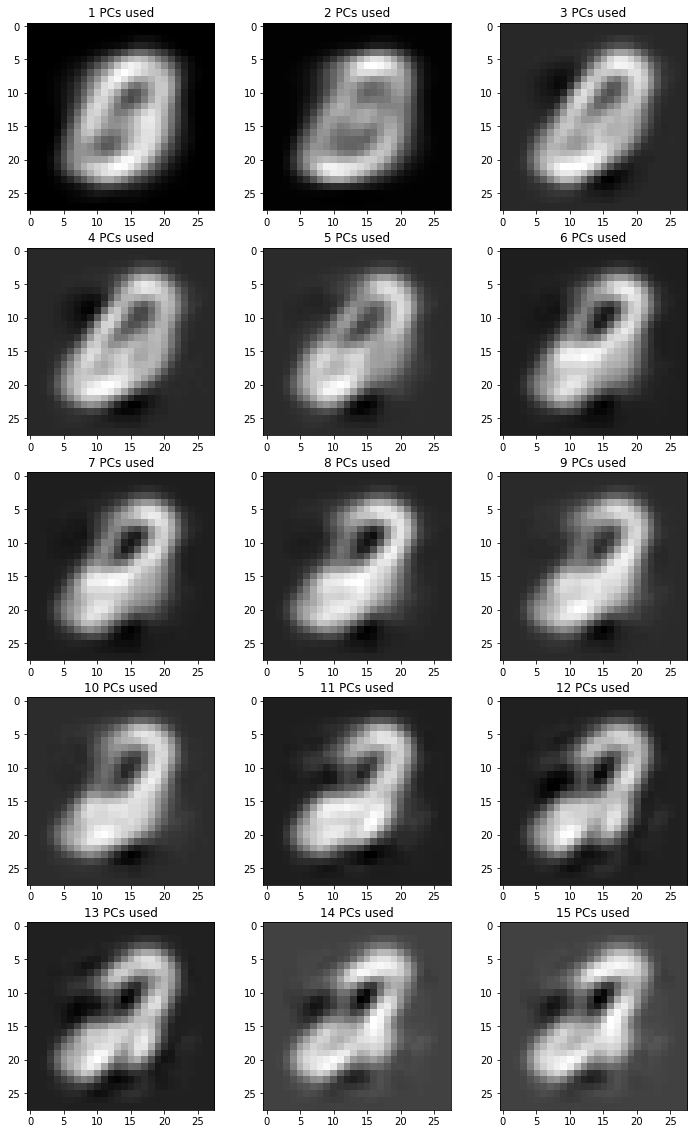

In [ ]:
image_pca(15)

Label is: 3


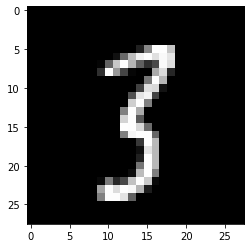

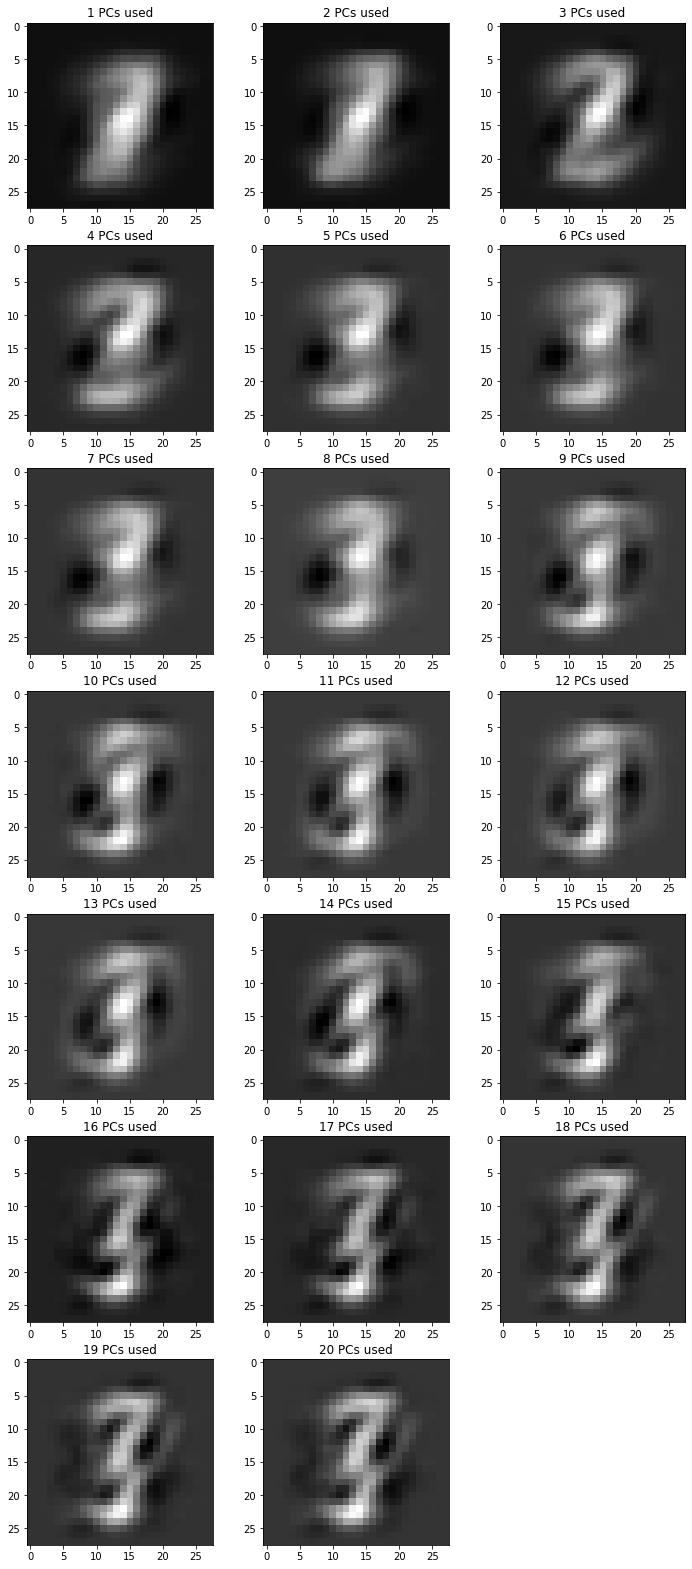

In [ ]:
image_pca(20)

**Run your function a few times, and determine how many components are required so that we (humans!) can identify the digits.**

After running the function a couple a times with different number of components, usually with 10 components we could make out the image a little bit but it also depends on the fonts of the number as certain fonts require more components like 15 or 20 to identify it correctly.


In [ ]:
#Assume we are sharing the data with 117 eigenvectors 
eigenVectors_shared = eigenVectors[:, 0:77].copy()
projection_shared = []
for image1 in range (1000):
  projection_shared1 = np.dot((x[image1].reshape(1, -1) - mean), eigenVectors[:, 0:77])
  projection_shared.append(projection_shared1)

projection_shared = np.array(projection_shared)
projection_shared = projection_shared.reshape(1000,77)

In [ ]:
#Calculating the compression ratio
total_size = x.shape[0]*x.shape[1]
total_eigen_size = eigenVectors_shared.shape[0]*eigenVectors_shared.shape[1]
total_proj_size = projection_shared.shape[0]*projection_shared.shape[1]
total_elements = total_eigen_size + total_proj_size
compression_ratio = (total_size/(total_elements + len(mean)))
print('The compression ratio is %f' %compression_ratio)

The compression ratio is 5.674909


# References

Understanding PCA and SVD:
1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8
2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca
3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues
4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:
1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/
2. https://www.value-at-risk.net/principal-component-analysis/

Covid Data:
1. https://www.worldometers.info/coronavirus/
2. https://datahub.io/core/covid-19#resource-time-series-19-covid-combined


